# Burned Area Calculation

#### Importing Packages

In [2]:
import rasterio                      #For .hdf Processing and Vizualization
import matplotlib                    #For Plotting Stylization
import numpy as np                   #For Calulations
import matplotlib.pyplot as plt      #For Plotting
import matplotlib.patches as patches #For Image Overlays
import gdal                          #This is for using hdf files

#### Graph Formatting

In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14 #Setting Figure Size in first dimension
fig_size[1] = 10 #Setting Figure Size in second dimension
plt.rcParams["figure.figsize"] = fig_size #Applying the parameters

font = {'family':'Times New Roman', #Setting the font characteristics
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font) #Applying the font

## Importing the .hdf files with GDAL

In [9]:
%%capture 

M231 = 'hdf/MOD11A1.A2020007.h29v12.006.2020009055231.hdf' #Land Surface Temp

!gdal_translate -sds $M231 tif/M231.tif

## Plotting Burned Area

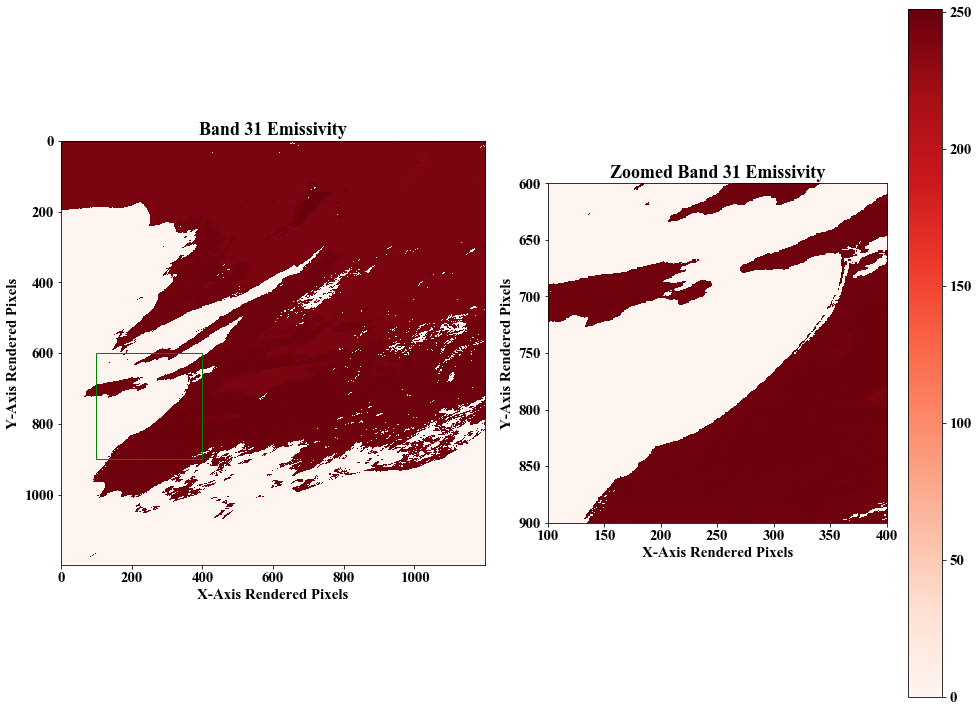

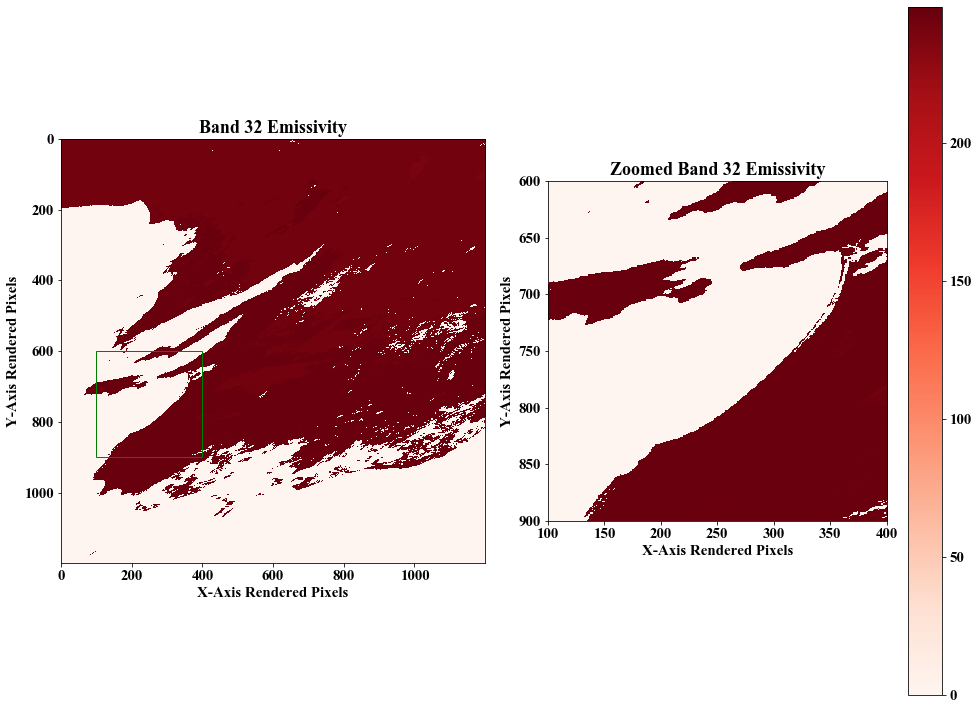

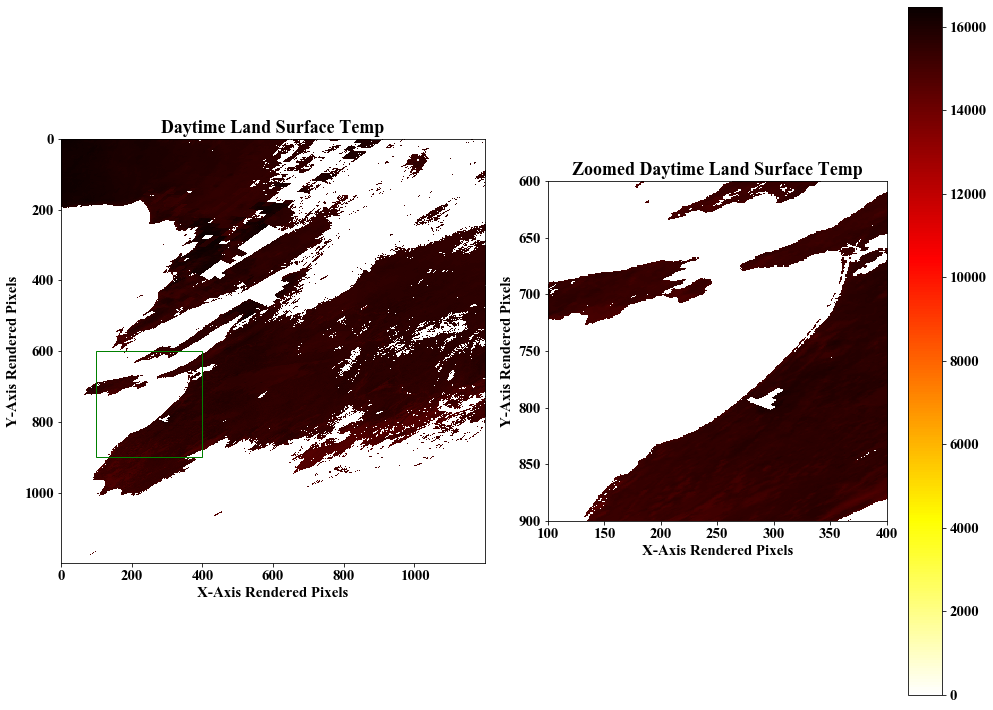

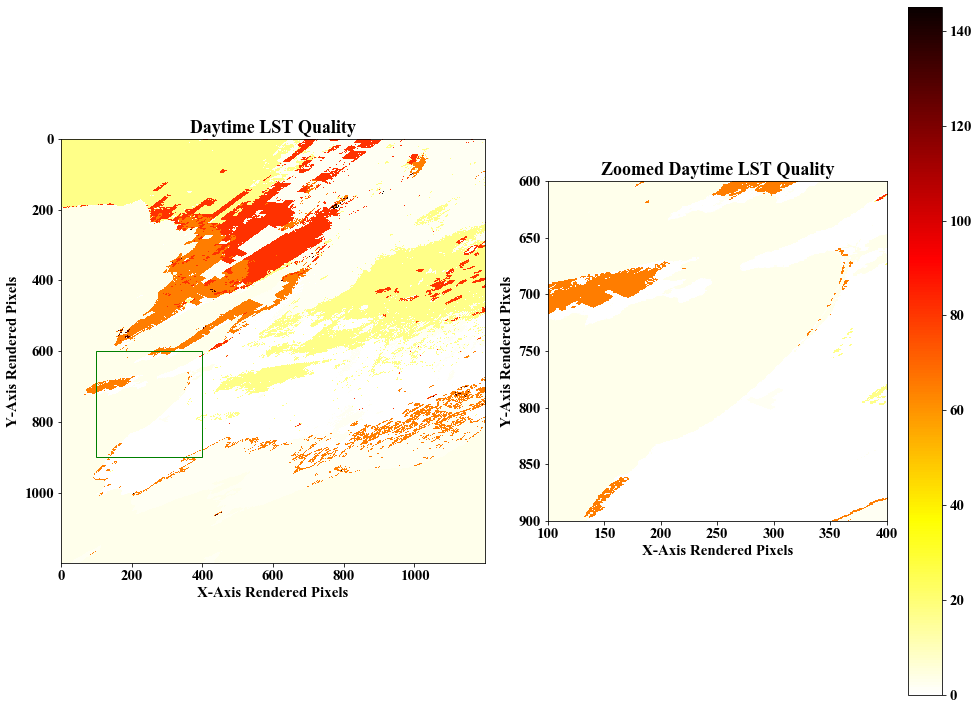

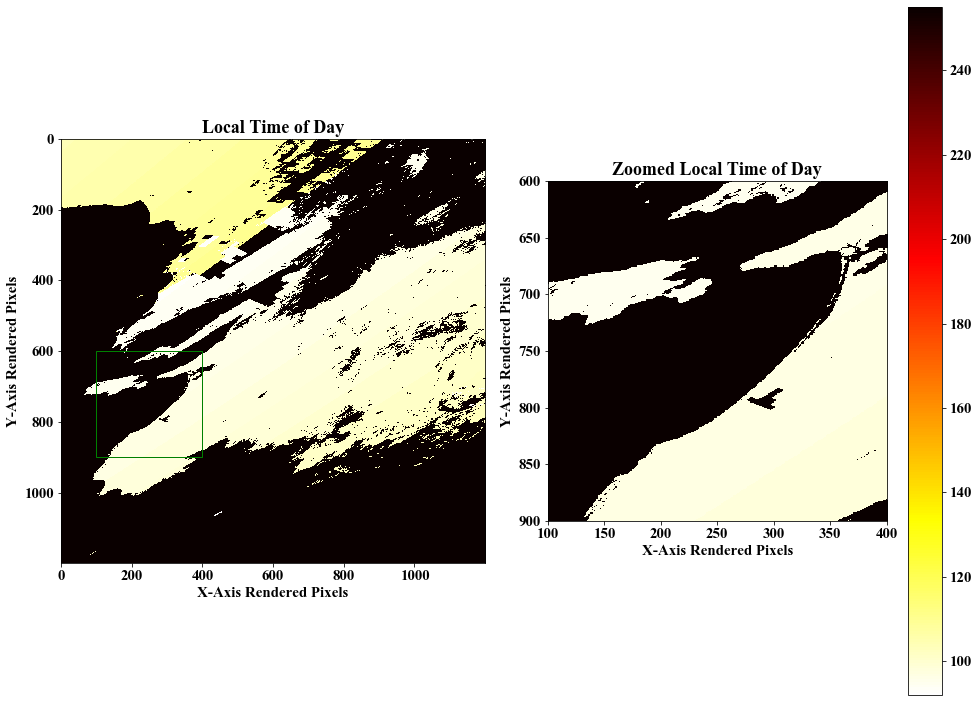

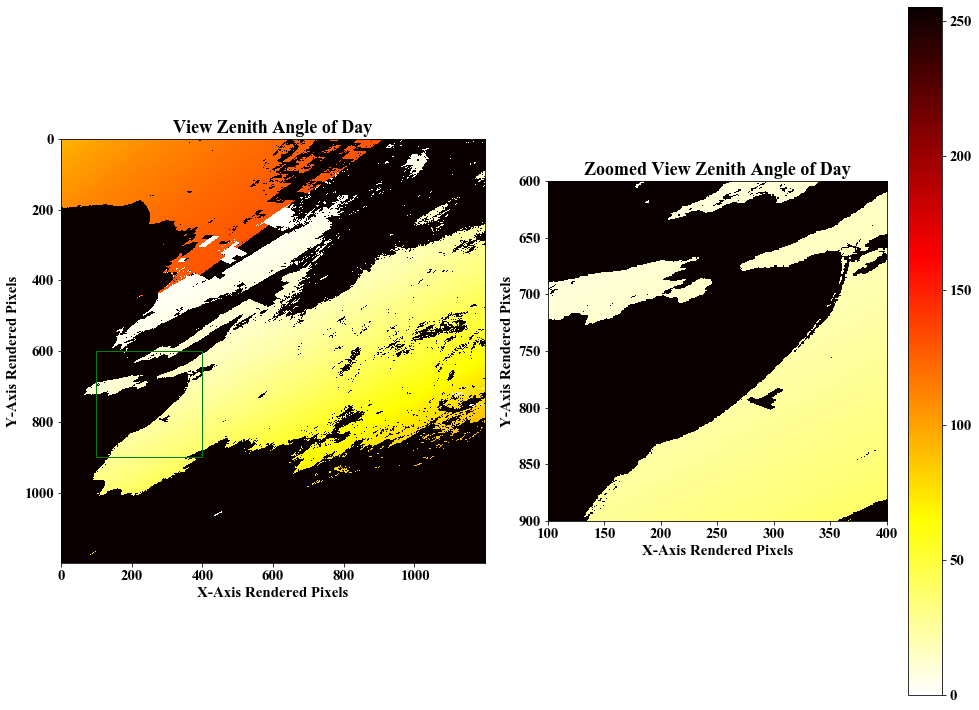

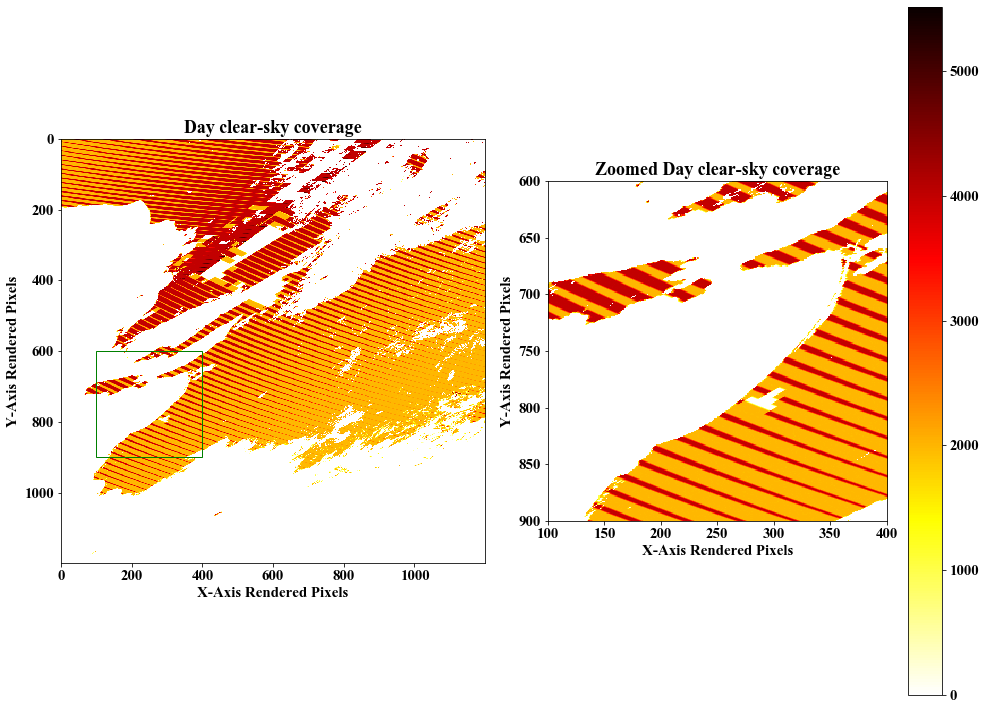

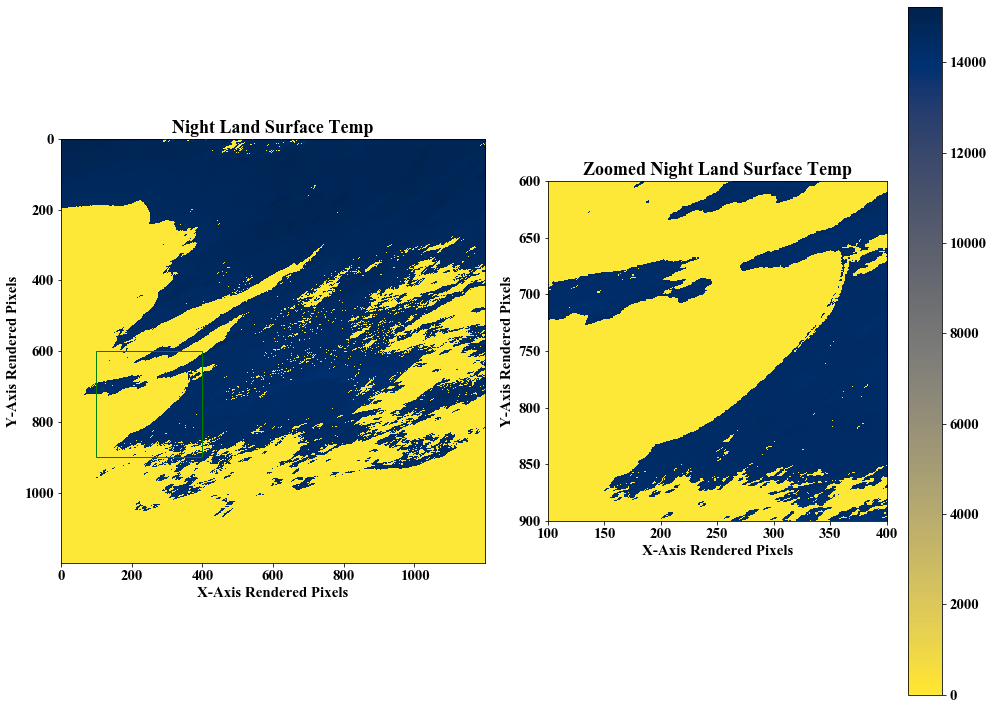

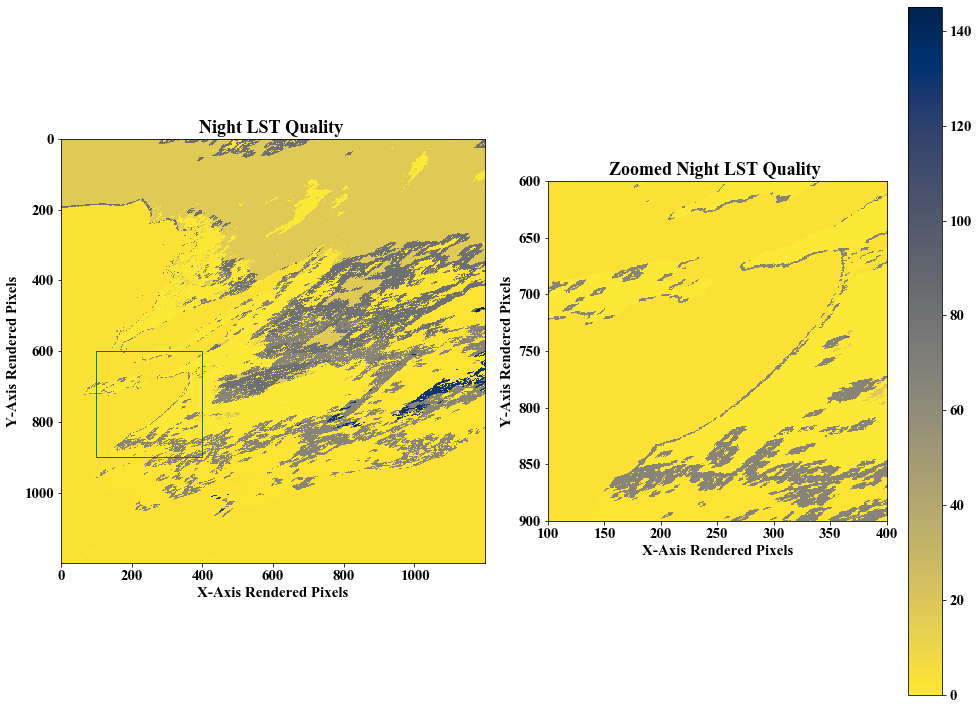

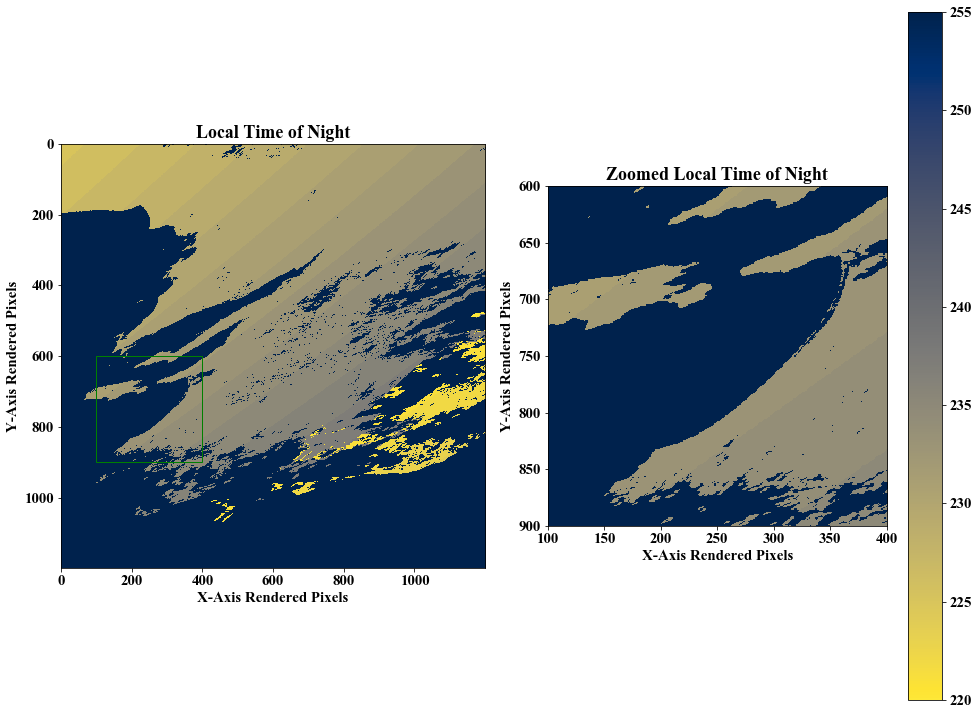

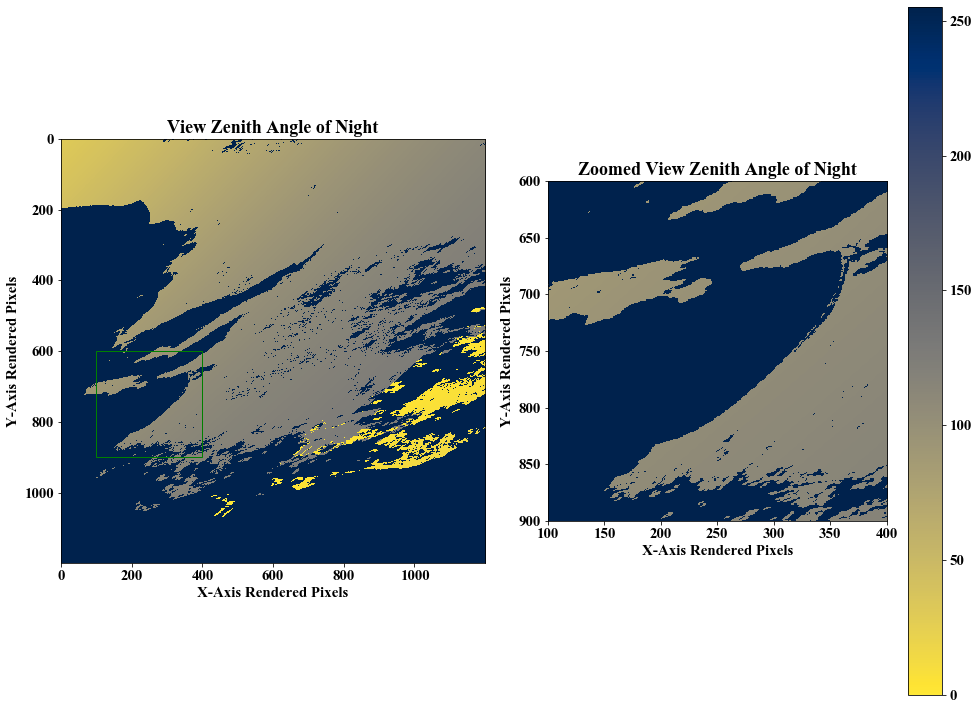

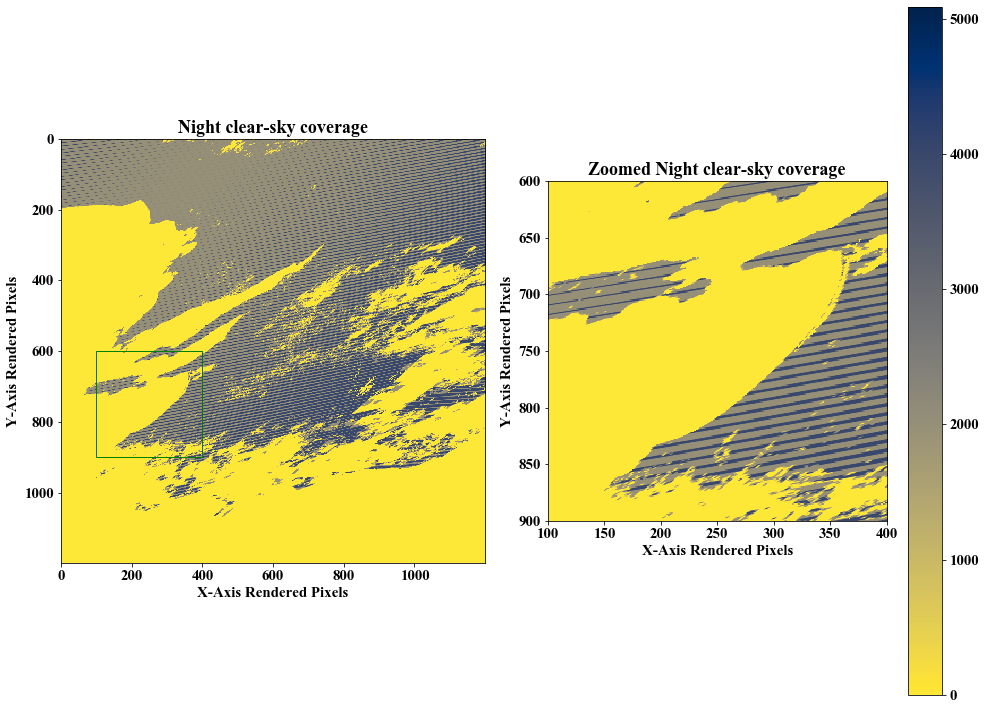

In [19]:
M231_1 = gdal.Open("tif/M231_01.tif").ReadAsArray()
M231_2 = gdal.Open("tif/M231_02.tif").ReadAsArray()
M231_3 = gdal.Open("tif/M231_03.tif").ReadAsArray()
M231_4 = gdal.Open("tif/M231_04.tif").ReadAsArray()
M231_5 = gdal.Open("tif/M231_05.tif").ReadAsArray()
M231_6 = gdal.Open("tif/M231_06.tif").ReadAsArray()
M231_7 = gdal.Open("tif/M231_07.tif").ReadAsArray()
M231_8 = gdal.Open("tif/M231_08.tif").ReadAsArray()
M231_9 = gdal.Open("tif/M231_09.tif").ReadAsArray()
M231_10 = gdal.Open("tif/M231_10.tif").ReadAsArray()
M231_11 = gdal.Open("tif/M231_11.tif").ReadAsArray()
M231_12 = gdal.Open("tif/M231_12.tif").ReadAsArray()

def InfPlot (source,name):
    #Plotting The Overall Image
    plt.set_cmap('Reds')
    ax = plt.subplot(1, 2, 1)
    ax.imshow(source)
    rect = patches.Rectangle((100,600),300,300,linewidth=1,edgecolor='g',facecolor='none')
    ax.add_patch(rect) # Add the patch to the Axes
    plt.title(name)
    plt.xlabel('X-Axis Rendered Pixels')
    plt.ylabel('Y-Axis Rendered Pixels')

    # Plotting The Specific Fire Location Area
    plt.subplot(1, 2, 2)
    plt.imshow(source)
    plt.xlim(100,400) #For setting x-axis limits
    plt.ylim(900,600) #For setting y-axis limits
    plt.title('Zoomed ' + name)
    plt.xlabel('X-Axis Rendered Pixels')
    plt.ylabel('Y-Axis Rendered Pixels')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

def DayPlot (source,name):
    #Plotting The Overall Image
    plt.set_cmap('hot_r')
    ax = plt.subplot(1, 2, 1)
    ax.imshow(source)
    rect = patches.Rectangle((100,600),300,300,linewidth=1,edgecolor='g',facecolor='none')
    ax.add_patch(rect) # Add the patch to the Axes
    plt.title(name)
    plt.set_cmap('hot_r')
    plt.xlabel('X-Axis Rendered Pixels')
    plt.ylabel('Y-Axis Rendered Pixels')

    # Plotting The Specific Fire Location Area
    plt.subplot(1, 2, 2)
    plt.imshow(source)
    plt.xlim(100,400) #For setting x-axis limits
    plt.ylim(900,600) #For setting y-axis limits
    plt.title('Zoomed ' + name)
    plt.xlabel('X-Axis Rendered Pixels')
    plt.ylabel('Y-Axis Rendered Pixels')
    plt.tight_layout()
    plt.colorbar()
    plt.show()
    
def NightPlot (source,name):
    #Plotting The Overall Image
    plt.set_cmap('cividis_r')
    ax = plt.subplot(1, 2, 1)
    ax.imshow(source)
    rect = patches.Rectangle((100,600),300,300,linewidth=1,edgecolor='g',facecolor='none')
    ax.add_patch(rect) # Add the patch to the Axes
    plt.title(name)
    plt.xlabel('X-Axis Rendered Pixels')
    plt.ylabel('Y-Axis Rendered Pixels')

    # Plotting The Specific Fire Location Area
    plt.subplot(1, 2, 2)
    plt.imshow(source)
    plt.xlim(100,400) #For setting x-axis limits
    plt.ylim(900,600) #For setting y-axis limits
    plt.title('Zoomed ' + name)
    plt.xlabel('X-Axis Rendered Pixels')
    plt.ylabel('Y-Axis Rendered Pixels')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

InfPlot(M231_9,'Band 31 Emissivity')
InfPlot(M231_10,'Band 32 Emissivity')
DayPlot(M231_1,'Daytime Land Surface Temp')
DayPlot(M231_2,'Daytime LST Quality')
DayPlot(M231_3,'Local Time of Day')
DayPlot(M231_4,'View Zenith Angle of Day')
DayPlot(M231_11,'Day clear-sky coverage')
NightPlot(M231_5,'Night Land Surface Temp')
NightPlot(M231_6,'Night LST Quality ')
NightPlot(M231_7,'Local Time of Night')
NightPlot(M231_8,'View Zenith Angle of Night')
NightPlot(M231_12,'Night clear-sky coverage')


## Calculating Image Information

In [20]:
def IStat (image):
    print('Image Information for',image)
    #Calculating the Area of the Images in Projected Units
    sat_data = rasterio.open(image)
    width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
    height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom
    print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))
    print("Rows: {}, Columns: {}".format(sat_data.height, sat_data.width))

    # Upper left pixel
    row_min = 0
    col_min = 0

    # Lower right pixel.  Rows and columns are zero indexing.
    row_max = sat_data.height - 1
    col_max = sat_data.width - 1

    # Transform coordinates with the dataset's affine transformation.
    topleft = sat_data.transform * (row_min, col_min)
    botright = sat_data.transform * (row_max, col_max)

    print("Top left corner coordinates: {}".format(topleft))
    print("Bottom right corner coordinates: {}".format(botright))
    print(sat_data.count)

    # Sequence of band indexes
    print(sat_data.indexes)
    print(" ")

IStat("tif/M231_01.tif")



Image Information for tif/M231_01.tif
Width: 1111950.519766001, Height: 1111950.519766
Rows: 1200, Columns: 1200
Top left corner coordinates: (12231455.717432, -3335851.5593)
Bottom right corner coordinates: (13342479.611764863, -4446875.453632861)
1
(1,)
 
